I will be following this youtube video as I solve the problem of which features to select.
Advanced Predictive Techniques with Scikit-Learn & TensorFlow–Feature Selection Method|packtpub.com
https://www.youtube.com/watch?v=fnupA1nWrHM&ab_channel=Packt


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import(
    SelectKBest, 
    chi2, 
    f_classif, 
    RFE
)
from tqdm import tqdm
import time
# matplotlib inline

In [5]:
default = pd.read_csv('../data/train.csv', index_col = 'match_id')

In [6]:
default = default.dropna()

In [7]:
default.drop(['color', 'map_code', 'car_name'], axis=1, inplace=True)

In [8]:
X = default.drop('rank', axis=1)
feature_names = X.columns
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = default['rank']

In [9]:
variances = pd.Series(default.drop('rank', axis=1).var(axis=0))

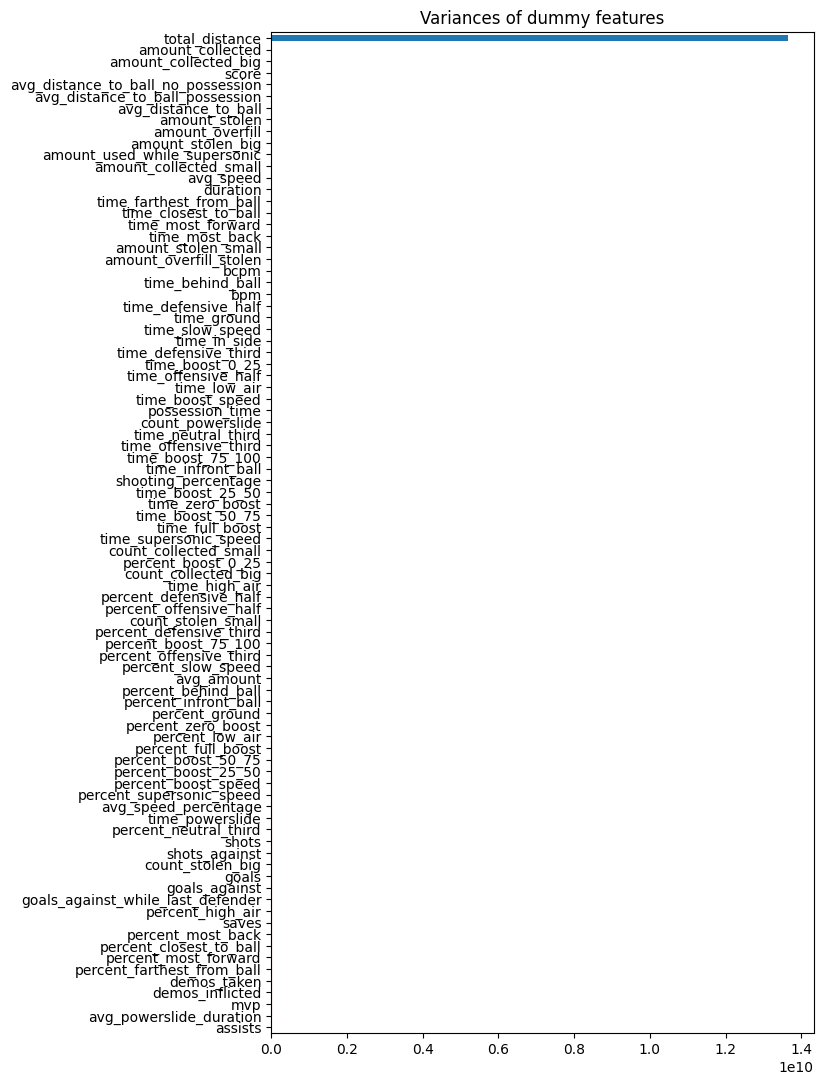

In [10]:
fig, ax = plt.subplots(figsize=(7,13))
variances.loc[feature_names].sort_values().plot(kind='barh', ax=ax)
ax.vlines(0.1, ymin = 1, ymax = 25, colors='red')
ax.set_title('Variances of dummy features');

In [11]:
feature_select = SelectKBest(chi2, k='all')
feature_select.fit(default[feature_names], default['rank'])

SelectKBest(k='all', score_func=<function chi2 at 0x117c3c860>)

                     Feature  Importance
54  percent_supersonic_speed    0.034282
42     time_supersonic_speed    0.025583
56           percent_low_air    0.022546
55            percent_ground    0.022520
53       percent_boost_speed    0.020981
..                       ...         ...
22          count_stolen_big    0.005281
5                      goals    0.004984
85               demos_taken    0.003218
84           demos_inflicted    0.003002
10                       mvp    0.001238

[85 rows x 2 columns]


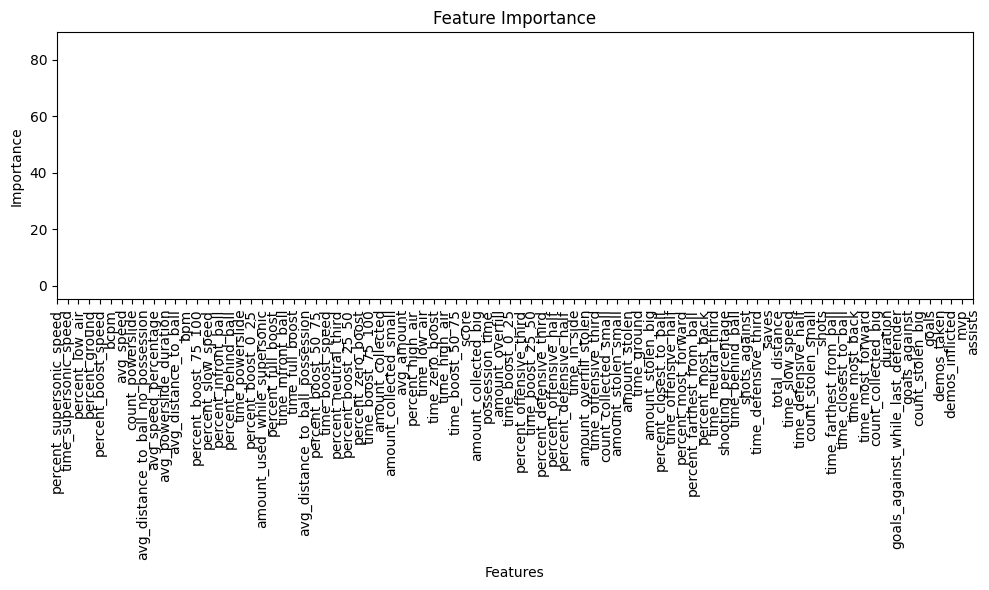

Top 85 features: ['percent_supersonic_speed', 'time_supersonic_speed', 'percent_low_air', 'percent_ground', 'percent_boost_speed', 'bcpm', 'avg_speed', 'count_powerslide', 'avg_distance_to_ball_no_possession', 'avg_speed_percentage', 'avg_powerslide_duration', 'avg_distance_to_ball', 'bpm', 'percent_boost_75_100', 'percent_slow_speed', 'percent_infront_ball', 'percent_behind_ball', 'time_powerslide', 'percent_boost_0_25', 'amount_used_while_supersonic', 'percent_full_boost', 'time_infront_ball', 'time_full_boost', 'avg_distance_to_ball_possession', 'percent_boost_50_75', 'time_boost_speed', 'percent_neutral_third', 'percent_boost_25_50', 'percent_zero_boost', 'time_boost_75_100', 'amount_collected', 'amount_collected_small', 'avg_amount', 'percent_high_air', 'time_low_air', 'time_zero_boost', 'time_high_air', 'time_boost_50_75', 'score', 'amount_collected_big', 'possession_time', 'amount_overfill', 'time_boost_0_25', 'percent_offensive_third', 'time_boost_25_50', 'percent_defensive_thi

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv('../data/train.csv', index_col = 'match_id')
data['rank_number'] = data['rank'].map({ 'bronze': 0, 'silver': 1, 'gold': 2, 'platinum': 3, 'diamond': 4, 'champion': 5})
X = data.drop(['rank', 'color', 'car_name', 'map_code', 'rank_number'], axis=1)
y = data['rank_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_85_features = feature_importance_df.head(85)

print(top_85_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance_df)), feature_importance_df['Importance'])
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 85 features:", top_85_features['Feature'].tolist())

In [20]:
top_85_features

,Feature,Importance
54,percent_supersonic_speed,0.034282
42,time_supersonic_speed,0.025583
56,percent_low_air,0.022546
55,percent_ground,0.022520
53,percent_boost_speed,0.020981
...,...,...
22,count_stolen_big,0.005281
5,goals,0.004984
85,demos_taken,0.003218
84,demos_inflicted,0.003002


In [13]:
pd.Series(feature_names).loc[feature_select.pvalues_>0.05]

80             percent_most_back
81          percent_most_forward
82       percent_closest_to_ball
83    percent_farthest_from_ball
dtype: object

In [14]:
print('Number of features:', X.shape[1])

Number of features: 86


In [15]:
RF = RandomForestClassifier(
    n_estimators=100, 
    max_depth=20, 
    max_features = 20, 
    random_state=55, 
    n_jobs=1
)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=20, n_jobs=1, random_state=55)

In [16]:
recursive_select = RFE(estimator = RF, n_features_to_select = 20, verbose=1)


recursive_select = recursive_select.fit(X, y)

Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 fe

In [17]:
recursive_select.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False])

In [18]:
print('20 top features:')
for x in feature_names[recursive_select.support_]:
    print(x)

20 top features:
bcpm
amount_collected_small
amount_used_while_supersonic
percent_zero_boost
percent_full_boost
percent_boost_25_50
percent_boost_50_75
percent_boost_75_100
time_supersonic_speed
count_powerslide
percent_boost_speed
percent_supersonic_speed
percent_ground
percent_low_air
avg_distance_to_ball_possession
avg_distance_to_ball_no_possession
percent_neutral_third
percent_offensive_half
percent_behind_ball
percent_closest_to_ball
